# 서울시 자전거도로 현황 통계
### 사용 데이터: 서울시 자전거도로 현황 통계
- url: https://data.seoul.go.kr/dataList/276/S/2/datasetView.do
- 작성년도: 2021년
- 정보: 자전거 전용도로, 자전거보행자 겸용도로, 자전거 전용차로, 자전거우선도로 에 대한 km수

In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [10]:
df = pd.read_csv("자전거도로현황(2021).csv")
df

,지역,소계,자전거 전용도로,자전거보행자 겸용도로,자전거 전용차로,자전거우선도로
0,전체소계,1290.4,181.0,843.5,75.5,190.5
1,구별소계,1009.4,148.9,594.5,75.5,190.5
2,종로구,31.6,4.2,10.4,6.9,10.1
3,중구,22.4,4.2,7.5,0.0,10.7
4,용산구,33.0,2.0,10.6,0.0,20.4
5,성동구,27.2,1.7,15.3,2.0,8.2
6,광진구,47.7,0.2,42.6,0.3,4.6
7,동대문구,37.7,2.8,7.5,0.0,27.4
8,중랑구,9.8,3.7,6.0,0.0,0.0
9,성북구,14.5,5.1,6.7,2.4,0.4


In [11]:
df_gu = df[2:27]
df_gu

,지역,소계,자전거 전용도로,자전거보행자 겸용도로,자전거 전용차로,자전거우선도로
2,종로구,31.6,4.2,10.4,6.9,10.1
3,중구,22.4,4.2,7.5,0.0,10.7
4,용산구,33.0,2.0,10.6,0.0,20.4
5,성동구,27.2,1.7,15.3,2.0,8.2
6,광진구,47.7,0.2,42.6,0.3,4.6
7,동대문구,37.7,2.8,7.5,0.0,27.4
8,중랑구,9.8,3.7,6.0,0.0,0.0
9,성북구,14.5,5.1,6.7,2.4,0.4
10,강북구,8.7,0.0,3.2,5.5,0.0
11,도봉구,12.9,1.4,11.5,0.0,0.0


In [12]:
df_etc = df[28:]
df_etc

,지역,소계,자전거 전용도로,자전거보행자 겸용도로,자전거 전용차로,자전거우선도로
28,교량,8.9,1.1,7.8,0.0,0.0
29,하천,266.9,30.2,236.7,0.0,0.0
30,공원,5.2,0.8,4.4,0.0,0.0


# 1. 서울시 자치구별 자전거도로 현황

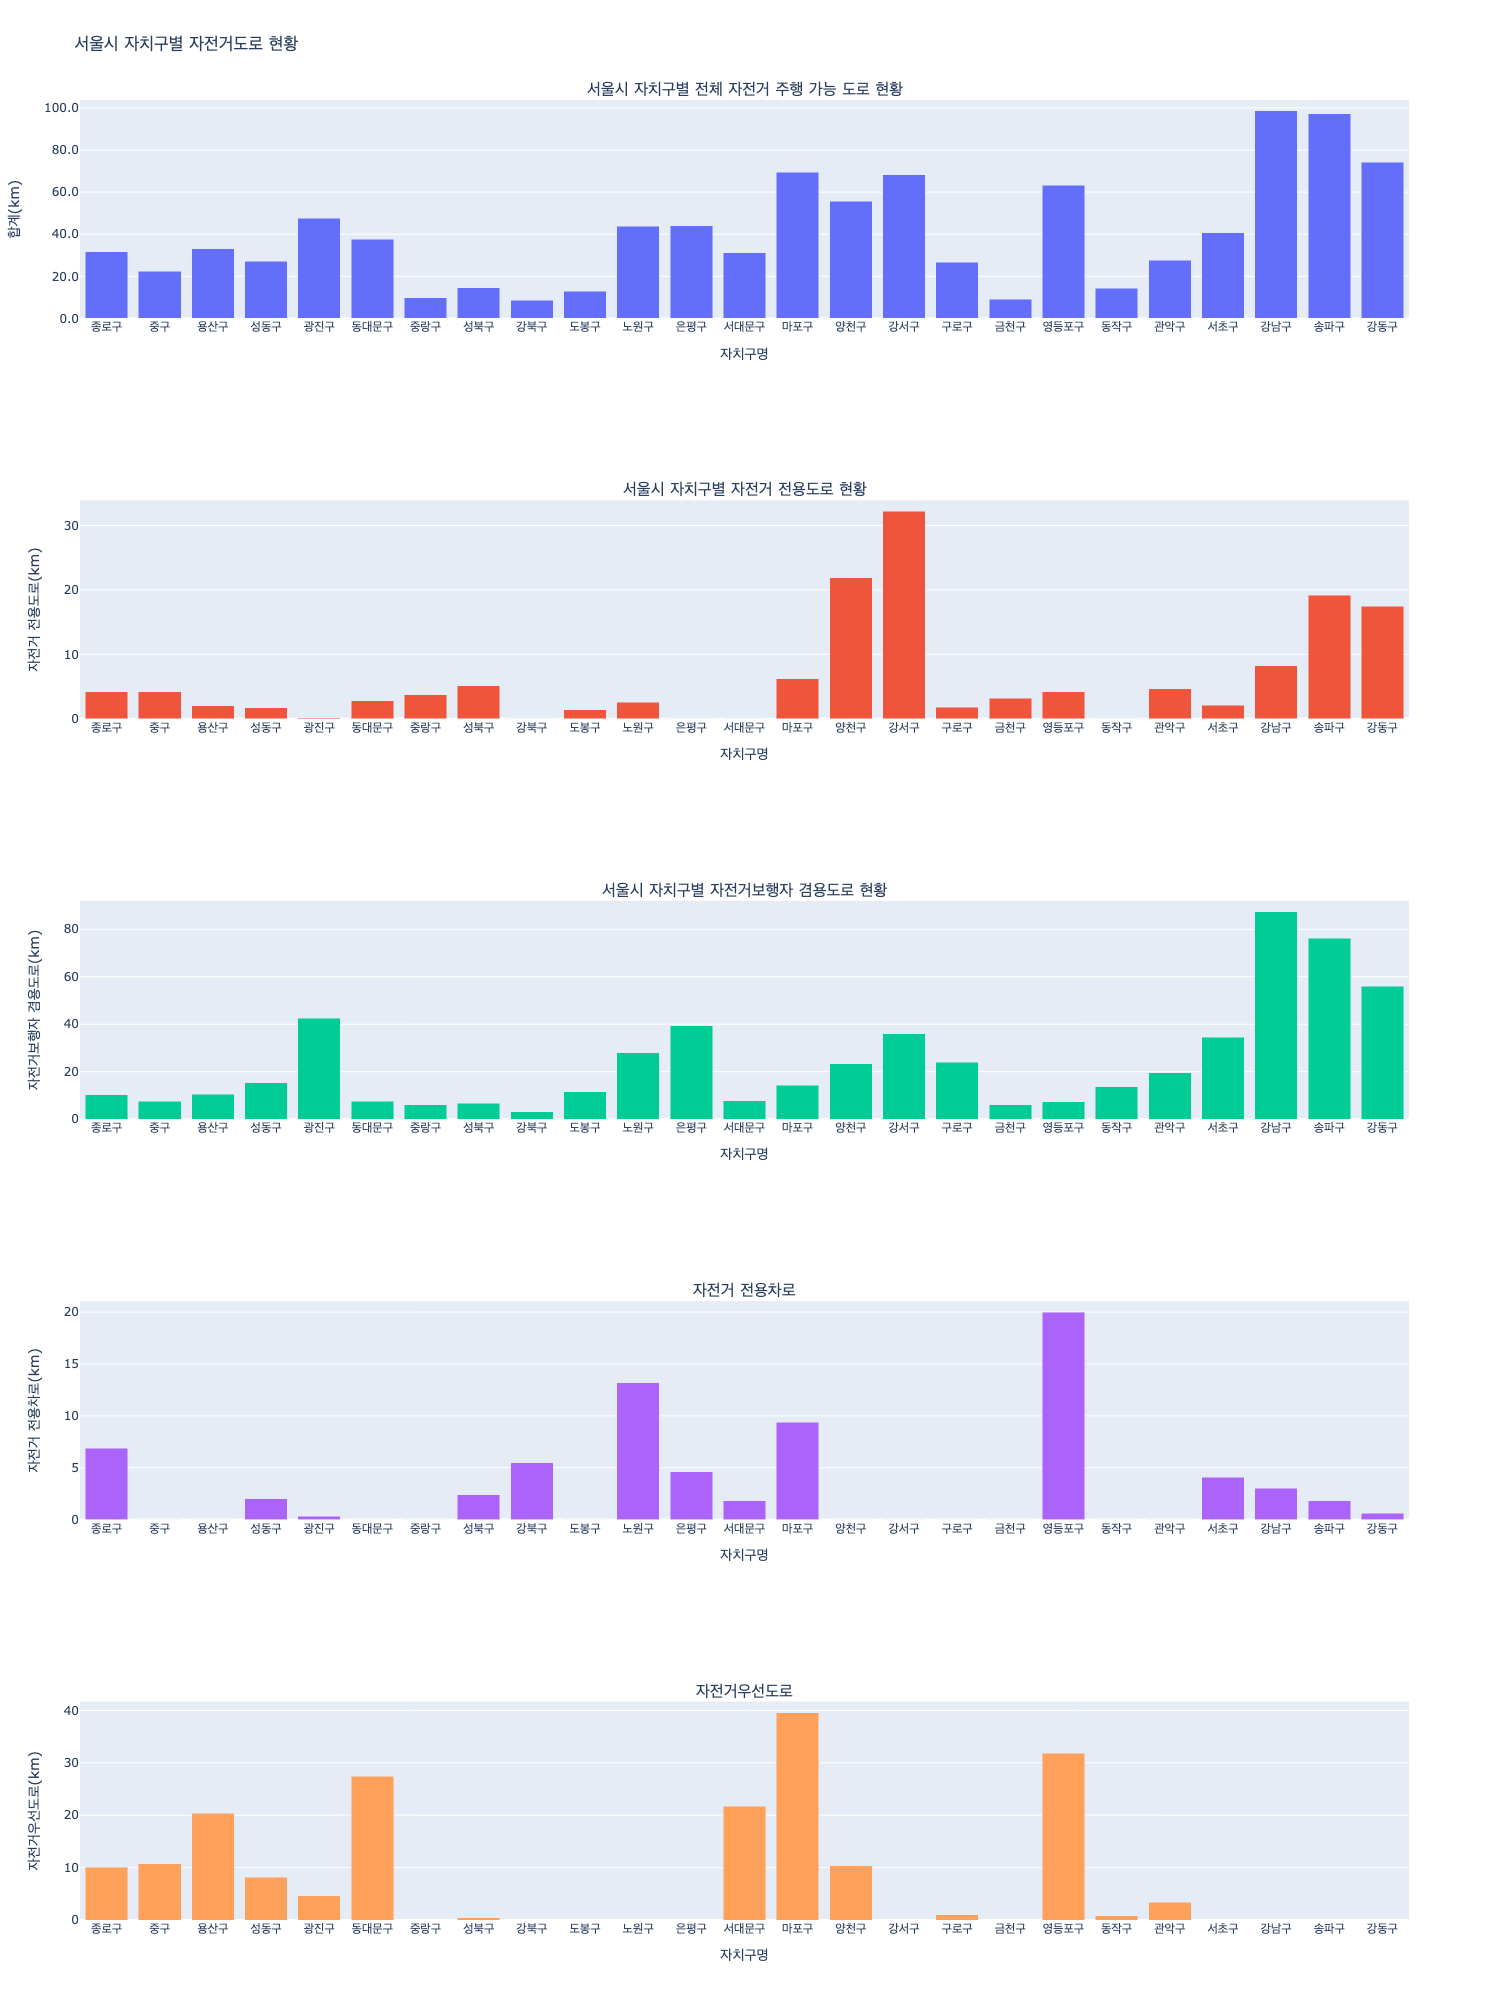

In [20]:
# Initialize figure with subplots
fig = make_subplots(
    rows=5, cols=1, subplot_titles=("서울시 자치구별 전체 자전거 주행 가능 도로 현황", "서울시 자치구별 자전거 전용도로 현황", "서울시 자치구별 자전거보행자 겸용도로 현황", "서울시 자치구별 자전거 전용차로", "서울시 자치구별 자전거우선도로")
)

# Add traces
fig.add_trace(go.Bar(x=df_gu.지역, y=df_gu['소계'], showlegend=False), row=1, col=1)
fig.add_trace(go.Bar(x=df_gu.지역, y=df_gu['자전거 전용도로'], showlegend=False), row=2, col=1)
fig.add_trace(go.Bar(x=df_gu.지역, y=df_gu['자전거보행자 겸용도로'], showlegend=False), row=3, col=1)
fig.add_trace(go.Bar(x=df_gu.지역, y=df_gu['자전거 전용차로'], showlegend=False), row=4, col=1)
fig.add_trace(go.Bar(x=df_gu.지역, y=df_gu['자전거우선도로'], showlegend=False), row=5, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="자치구명", row=1, col=1)
fig.update_xaxes(title_text="자치구명", row=2, col=1)
fig.update_xaxes(title_text="자치구명", row=3, col=1)
fig.update_xaxes(title_text="자치구명", row=4, col=1)
fig.update_xaxes(title_text="자치구명", row=5, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="합계(km)", row=1, col=1)
fig.update_yaxes(title_text="자전거 전용도로(km)", row=2, col=1)
fig.update_yaxes(title_text="자전거보행자 겸용도로(km)", row=3, col=1)
fig.update_yaxes(title_text="자전거 전용차로(km)", row=4, col=1)
fig.update_yaxes(title_text="자전거우선도로(km)", row=5, col=1)

# Update title and height
fig.update_layout(title_text="서울시 자치구별 자전거도로 현황", height=2000, barmode='stack', yaxis=dict(tickformat=".1f"))


fig.show()

# 2. 서울시 기타지역별 자전거도로 현황

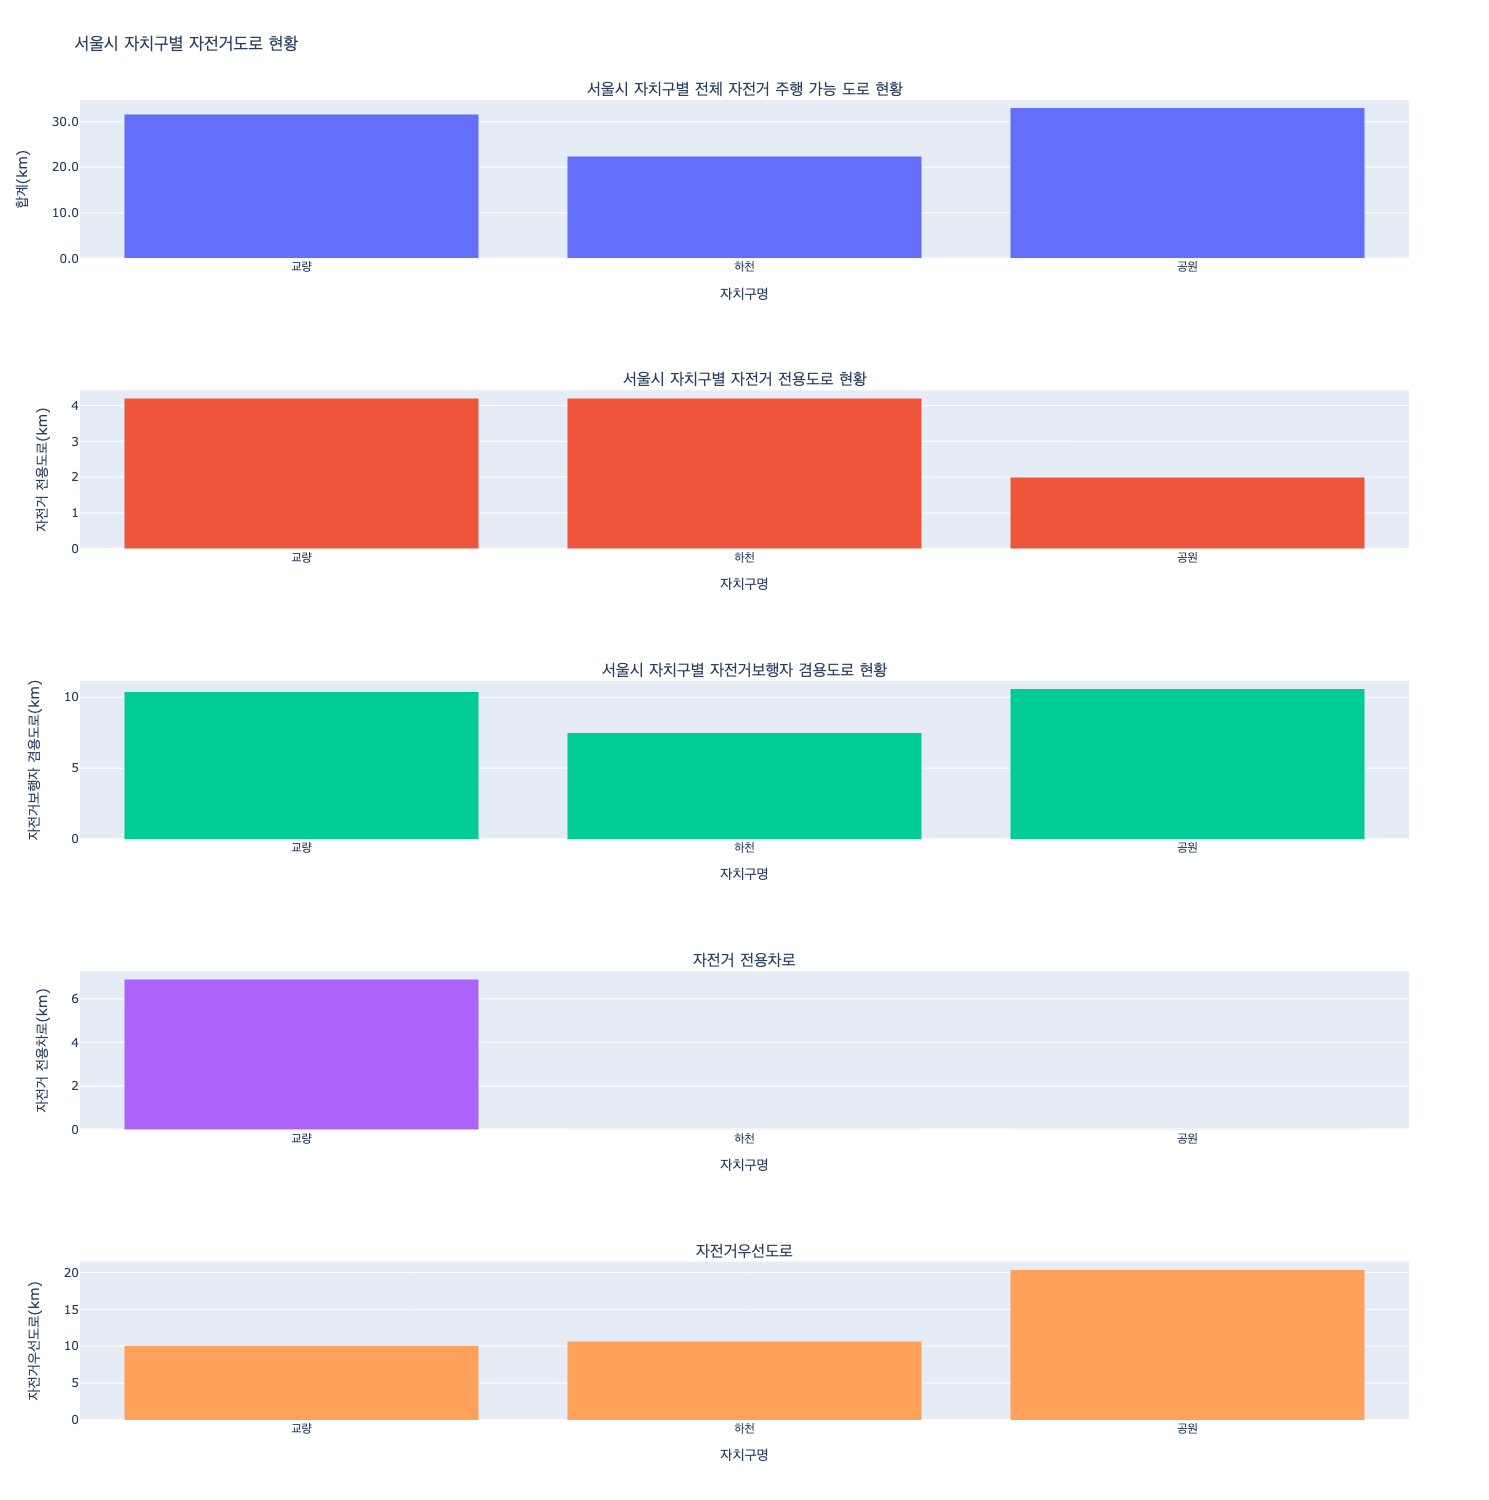

In [19]:
# Initialize figure with subplots
fig2 = make_subplots(
    rows=5, cols=1, subplot_titles=("서울시 기타지역별 전체 자전거 주행 가능 도로 현황", "서울시 기타지역별 자전거 전용도로 현황", "서울시 기타지역별 자전거보행자 겸용도로 현황", "서울시 기타지역별 자전거 전용차로", "서울시 기타지역별 자전거우선도로")
)

# Add traces
fig2.add_trace(go.Bar(x=df_etc.지역, y=df_gu['소계'], showlegend=False), row=1, col=1)
fig2.add_trace(go.Bar(x=df_etc.지역, y=df_gu['자전거 전용도로'], showlegend=False), row=2, col=1)
fig2.add_trace(go.Bar(x=df_etc.지역, y=df_gu['자전거보행자 겸용도로'], showlegend=False), row=3, col=1)
fig2.add_trace(go.Bar(x=df_etc.지역, y=df_gu['자전거 전용차로'], showlegend=False), row=4, col=1)
fig2.add_trace(go.Bar(x=df_etc.지역, y=df_gu['자전거우선도로'], showlegend=False), row=5, col=1)

# Update xaxis properties
fig2.update_xaxes(title_text="자치구명", row=1, col=1)
fig2.update_xaxes(title_text="자치구명", row=2, col=1)
fig2.update_xaxes(title_text="자치구명", row=3, col=1)
fig2.update_xaxes(title_text="자치구명", row=4, col=1)
fig2.update_xaxes(title_text="자치구명", row=5, col=1)

# Update yaxis properties
fig2.update_yaxes(title_text="합계(km)", row=1, col=1)
fig2.update_yaxes(title_text="자전거 전용도로(km)", row=2, col=1)
fig2.update_yaxes(title_text="자전거보행자 겸용도로(km)", row=3, col=1)
fig2.update_yaxes(title_text="자전거 전용차로(km)", row=4, col=1)
fig2.update_yaxes(title_text="자전거우선도로(km)", row=5, col=1)

# Update title and height
fig2.update_layout(title_text="서울시 기타지역별 자전거도로 현황", height=1500, barmode='stack', yaxis=dict(tickformat=".1f"))


fig2.show()